<a href="https://colab.research.google.com/github/Dhruv1603/CNN_VS_ANN/blob/main/CNN_VS_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import Lib

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models


In [2]:
# Import Dataset

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()


In [3]:
# Normalize the image

train_images, test_images = train_images / 255.0, test_images / 255.0

In [4]:
# Defining class name

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


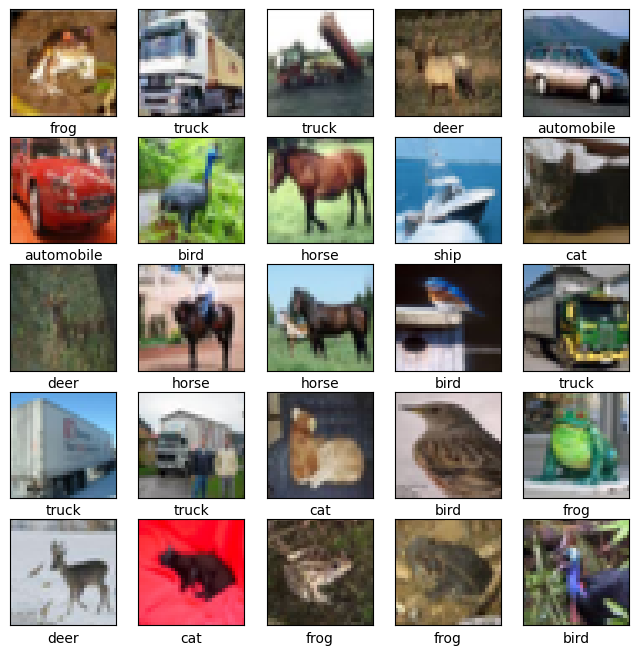

In [5]:
# Ploting few images from dataset

plt.figure(figsize=(8,8))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

## CNN

In [6]:
# Define CNN Model

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.BatchNormalization(),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

In [7]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [8]:
history = model.fit(train_images, train_labels, epochs=20,
                    validation_data=(test_images, test_labels))

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1563/1563 [==============================] - 24s 9ms/step - loss: 1.6983 - accuracy: 0.4293 - val_loss: 1.2684 - val_accuracy: 0.5358
Epoch 2/20
1563/1563 [==============================] - 14s 9ms/step - loss: 1.1569 - accuracy: 0.5896 - val_loss: 0.9628 - val_accuracy: 0.6545
Epoch 3/20
1563/1563 [==============================] - 14s 9ms/step - loss: 0.9748 - accuracy: 0.6591 - val_loss: 0.8811 - val_accuracy: 0.6897
Epoch 4/20
1563/1563 [==============================] - 15s 10ms/step - loss: 0.8740 - accuracy: 0.6941 - val_loss: 0.9919 - val_accuracy: 0.6655
Epoch 5/20
1563/1563 [==============================] - 14s 9ms/step - loss: 0.7986 - accuracy: 0.7234 - val_loss: 0.7247 - val_accuracy: 0.7449
Epoch 6/20
1563/1563 [==============================] - 14s 9ms/step - loss: 0.7482 - accuracy: 0.7401 - val_loss: 0.7040 - val_accuracy: 0.7578
Epoch 7/20
1563/1563 [==============================] - 14s 9ms/step - loss: 0.7073 - accuracy: 0.7548 - val_loss: 0.8053 - val_accuracy: 0.

In [9]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print("\nTest accuracy:", test_acc)

313/313 - 1s - loss: 0.5164 - accuracy: 0.8272 - 888ms/epoch - 3ms/step

Test accuracy: 0.8271999955177307


In [ ]:
predictions = model.predict(test_images)

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i])
    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i][0]
    if predicted_label == true_label:
      color = 'blue'
    else:
      color = 'red'
    plt.xlabel(f"{class_names[true_label]} ({class_names[predicted_label]})", color=color)
plt.show()

313/313 - 1s - loss: 0.5164 - accuracy: 0.8272 - 878ms/epoch - 3ms/step


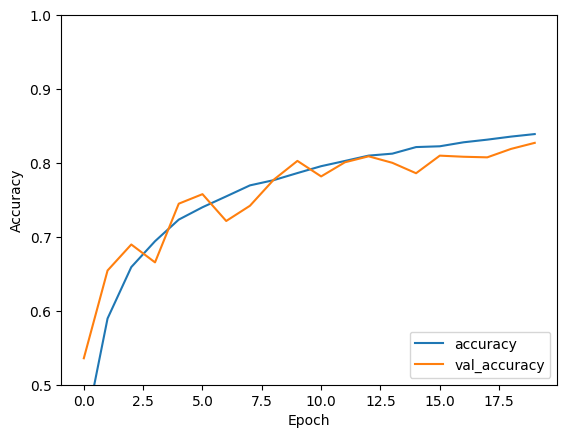

In [11]:
# prompt: plot accuracy graph

import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)


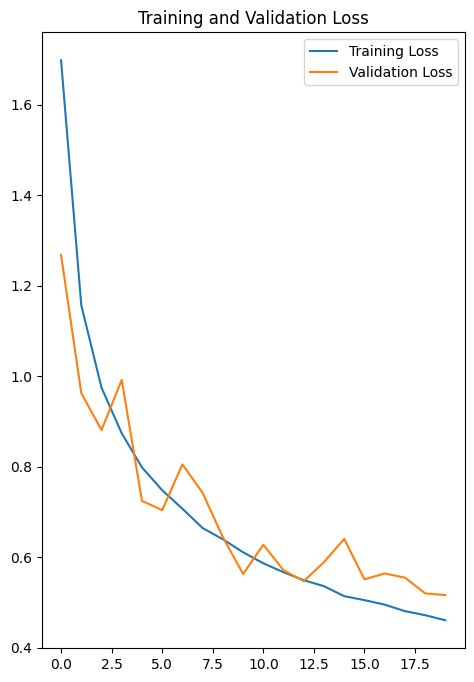

In [13]:
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## ANN

In [14]:
# Define ANN Model

ann_model = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(32, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
])


In [15]:
# Compile the ANN model

ann_model.compile(optimizer='Adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])


In [16]:
ann_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_2 (Dense)             (None, 32)                98336     
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 512)               66048     
                                                                 
 dense_6 (Dense)             (None, 10)                5130      
                                                                 
Total params: 179946 (702.91 KB)
Trainable params: 179

In [17]:
ann_history = ann_model.fit(train_images, train_labels, epochs=20,
                            validation_data=(test_images, test_labels))

Epoch 1/20
1563/1563 [==============================] - 8s 4ms/step - loss: 1.9735 - accuracy: 0.2566 - val_loss: 1.9354 - val_accuracy: 0.2742
Epoch 2/20
1563/1563 [==============================] - 7s 5ms/step - loss: 1.8791 - accuracy: 0.3092 - val_loss: 1.8272 - val_accuracy: 0.3264
Epoch 3/20
1563/1563 [==============================] - 7s 4ms/step - loss: 1.8546 - accuracy: 0.3188 - val_loss: 1.8359 - val_accuracy: 0.3249
Epoch 4/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.8365 - accuracy: 0.3268 - val_loss: 1.8946 - val_accuracy: 0.3022
Epoch 5/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.8270 - accuracy: 0.3289 - val_loss: 1.8166 - val_accuracy: 0.3293
Epoch 6/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.8172 - accuracy: 0.3352 - val_loss: 1.8019 - val_accuracy: 0.3366
Epoch 7/20
1563/1563 [==============================] - 7s 5ms/step - loss: 1.8136 - accuracy: 0.3354 - val_loss: 1.8206 - val_accuracy:

In [18]:
# Test the model

ann_test_loss, ann_test_acc = ann_model.evaluate(test_images, test_labels, verbose=2)
print(f'\nANN Test accuracy: {ann_test_acc}')

313/313 - 1s - loss: 1.7877 - accuracy: 0.3442 - 601ms/epoch - 2ms/step

ANN Test accuracy: 0.3441999852657318


313/313 [==============================] - 1s 2ms/step


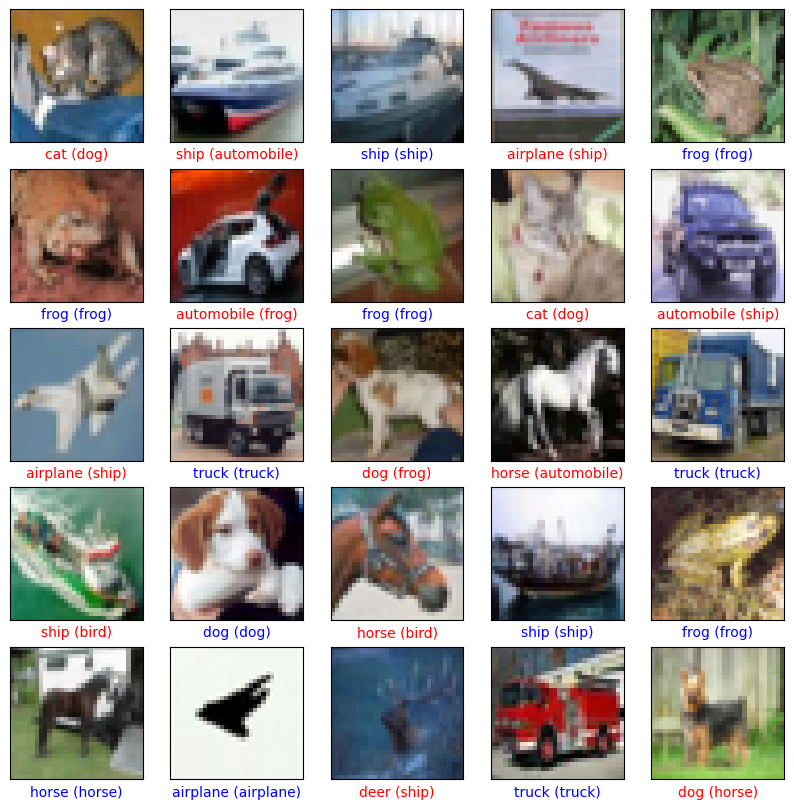

In [22]:
ann_predictions = ann_model.predict(test_images)

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i])
    predicted_label = np.argmax(ann_predictions[i])
    true_label = test_labels[i][0]
    if predicted_label == true_label:
      color = 'blue'
    else:
      color = 'red'
    plt.xlabel(f"{class_names[true_label]} ({class_names[predicted_label]})", color=color)
plt.show()

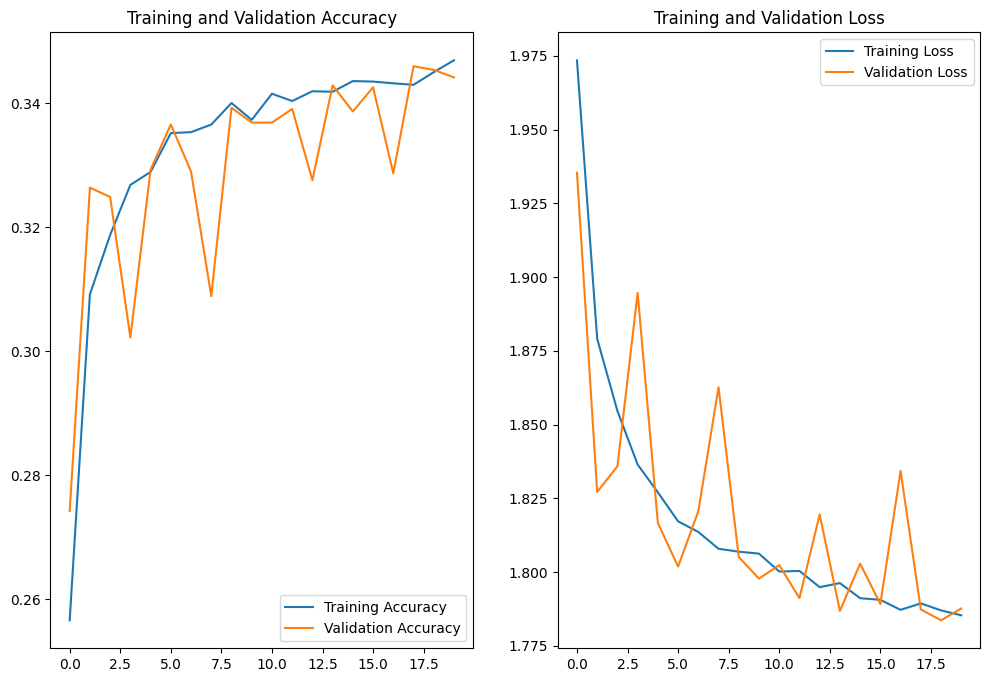

In [21]:
# Plot accuracy and loss of ANN

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(ann_history.history['accuracy'], label='Training Accuracy')
plt.plot(ann_history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(ann_history.history['loss'], label='Training Loss')
plt.plot(ann_history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

##Compare both Model

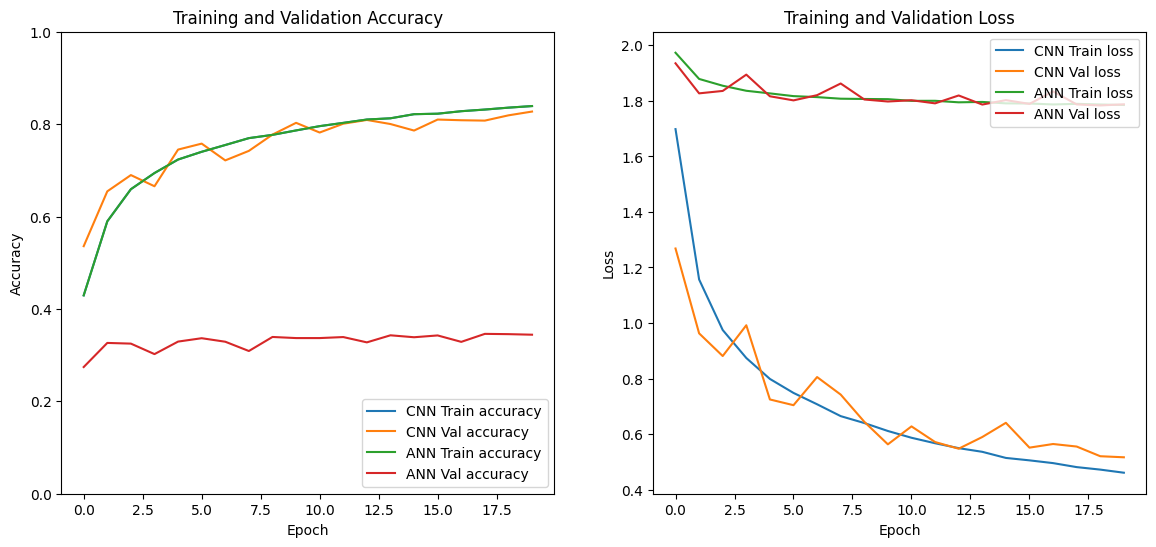

In [20]:
# Compare with graph

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='CNN Train accuracy')
plt.plot(history.history['val_accuracy'], label='CNN Val accuracy')
plt.plot(history.history['accuracy'], label='ANN Train accuracy')
plt.plot(ann_history.history['val_accuracy'], label='ANN Val accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='CNN Train loss')
plt.plot(history.history['val_loss'], label='CNN Val loss')
plt.plot(ann_history.history['loss'], label='ANN Train loss')
plt.plot(ann_history.history['val_loss'], label='ANN Val loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()